--> Combining the weather data.

--> Visualising missing data.

--> Removing the rows with missing data.

--> Storing the Processed flight dataframe to 'weather_data_full.csv'.

**IMPORTS**

In [ ]:
import pandas as pd
import os
import missingno as msno

In [ ]:
#selected airports
airports = ('ATL','CLT','DEN','DFW','EWR','IAH','JFK','LAS','LAX','MCO','MIA','ORD','PHX','SEA','SFO')
years = ["2016","2017"]

In [ ]:
weather_data = pd.read_json("/content/drive/MyDrive/Flight_delay_prediction/weather/ATL/2016-1.json")
weather_data

,data
request,"[{'query': 'ATL, Hartsfield-Jackson Atlanta In..."
weather,"[{'mintempC': '5', 'maxtempF': '51', 'sunHour'..."


In [ ]:
wd = weather_data["data"]["weather"]
wd_df = (pd.DataFrame(wd))
print(wd_df.columns)
print(wd_df.shape)
wd_df.head()

Index(['mintempC', 'maxtempF', 'sunHour', 'mintempF', 'maxtempC', 'hourly',
       'totalSnow_cm', 'date', 'astronomy', 'uvIndex'],
      dtype='object')
(31, 10)


,mintempC,maxtempF,sunHour,mintempF,maxtempC,hourly,totalSnow_cm,date,astronomy,uvIndex
0,5,51,7.5,42,11,"[{'windspeedKmph': '11', 'FeelsLikeF': '46', '...",0.0,2016-01-01,"[{'moon_phase': 'Waning Gibbous', 'moonrise': ...",0
1,2,48,9.0,35,9,"[{'windspeedKmph': '15', 'FeelsLikeF': '34', '...",0.0,2016-01-02,"[{'moon_phase': 'Last Quarter', 'moonrise': '0...",0
2,3,51,7.5,38,11,"[{'windspeedKmph': '10', 'FeelsLikeF': '37', '...",0.0,2016-01-03,"[{'moon_phase': 'Last Quarter', 'moonrise': '0...",0
3,-1,46,9.5,31,8,"[{'windspeedKmph': '13', 'FeelsLikeF': '37', '...",0.0,2016-01-04,"[{'moon_phase': 'Last Quarter', 'moonrise': '0...",0
4,1,43,10.0,33,6,"[{'windspeedKmph': '12', 'FeelsLikeF': '28', '...",0.0,2016-01-05,"[{'moon_phase': 'Waning Crescent', 'moonrise':...",0


In [ ]:
print(wd_df['hourly'][0])

[{'windspeedKmph': '11', 'FeelsLikeF': '46', 'winddir16Point': 'NW', 'FeelsLikeC': '8', 'DewPointC': '8', 'windspeedMiles': '7', 'DewPointF': '47', 'HeatIndexF': '49', 'cloudcover': '100', 'HeatIndexC': '10', 'precipMM': '0.1', 'weatherIconUrl': [{'value': 'http://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0025_light_rain_showers_night.png'}], 'WindGustMiles': '11', 'pressure': '1023', 'WindGustKmph': '17', 'weatherDesc': [{'value': 'Patchy rain possible'}], 'visibility': '10', 'weatherCode': '176', 'tempC': '10', 'tempF': '49', 'WindChillF': '46', 'WindChillC': '8', 'winddirDegree': '318', 'humidity': '91', 'time': '0'}, {'windspeedKmph': '13', 'FeelsLikeF': '42', 'winddir16Point': 'NW', 'FeelsLikeC': '6', 'DewPointC': '7', 'windspeedMiles': '8', 'DewPointF': '44', 'HeatIndexF': '46', 'cloudcover': '100', 'HeatIndexC': '8', 'precipMM': '0.0', 'weatherIconUrl': [{'value': 'http://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0025_light_rain_showers_night.

In [ ]:
print(wd_df['astronomy'][0])

[{'moon_phase': 'Waning Gibbous', 'moonrise': '12:52 AM', 'moonset': '01:11 PM', 'sunset': '06:40 PM', 'moon_illumination': '76', 'sunrise': '08:42 AM'}]


In [ ]:
wd_df = pd.json_normalize(data=wd,record_path = 'hourly',meta = 'date')
wd_df


,windspeedKmph,FeelsLikeF,winddir16Point,FeelsLikeC,DewPointC,windspeedMiles,DewPointF,HeatIndexF,cloudcover,HeatIndexC,...,visibility,weatherCode,tempC,tempF,WindChillF,WindChillC,winddirDegree,humidity,time,date
0,11,46,NW,8,8,7,47,49,100,10,...,10,176,10,49,46,8,318,91,0,2016-01-01
1,13,42,NW,6,7,8,44,46,100,8,...,10,176,8,46,42,6,317,92,100,2016-01-01
2,14,38,NW,3,5,9,41,43,100,6,...,10,122,6,43,38,3,315,92,200,2016-01-01
3,16,33,NW,1,3,10,38,40,100,4,...,10,122,4,40,33,1,314,93,300,2016-01-01
4,17,33,NW,1,3,10,38,40,100,4,...,10,122,4,40,33,1,314,93,400,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,13,60,SSE,15,12,8,54,60,96,16,...,10,122,16,60,60,15,169,82,1900,2016-01-31
740,13,59,SSE,15,12,8,54,60,95,15,...,10,122,15,60,59,15,165,82,2000,2016-01-31
741,12,59,SSE,15,12,8,54,59,95,15,...,10,122,15,59,59,15,162,83,2100,2016-01-31
742,13,58,SSE,14,12,8,54,59,92,15,...,10,122,15,59,58,14,164,83,2200,2016-01-31


In [ ]:
weather_data = []

for i in airports:
  for j in years:
    for k in range(1,13):
      file = f"/content/drive/MyDrive/Flight_delay_prediction/weather/{i}/{j}-{k}.json"
      weather_data_df = pd.read_json(file)
      wd = weather_data_df["data"]["weather"]
      wd_df = pd.json_normalize(data=wd,record_path = 'hourly',meta = 'date')
      wd_df = wd_df[['windspeedKmph', 'winddirDegree','weatherCode','precipMM','visibility','pressure','cloudcover','DewPointF',
          'WindGustKmph','tempF','WindChillF','humidity','date','time']]
      wd_df["airport_code"] = i
      weather_data.append(wd_df)




<ipython-input-8-6b580ea23cd9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_df["airport_code"] = i
<ipython-input-8-6b580ea23cd9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_df["airport_code"] = i
<ipython-input-8-6b580ea23cd9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [ ]:
weather_data[3].describe()

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport_code
count,720,720,720,720,720,720,720,720,720,720,720,720,720,720,720
unique,27,264,16,69,9,23,93,47,34,47,47,74,30,24,1
top,11,79,113,0.0,10,1020,0,64,18,55,65,58,2016-04-01,0,ATL
freq,52,10,357,485,562,70,231,35,51,36,32,21,24,30,720


In [ ]:
len(weather_data)

360

In [ ]:
dummy = pd.DataFrame(weather_data[340])

In [ ]:

dummy['airport_code'].value_counts()

SFO    744
Name: airport_code, dtype: int64

In [ ]:
dummy

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport_code
0,5,252,113,0.0,10,1010,1,57,8,61,61,86,2016-05-01,0,SFO
1,4,236,113,0.0,9,1010,3,56,7,60,60,88,2016-05-01,100,SFO
2,3,221,113,0.0,8,1010,5,55,6,58,58,90,2016-05-01,200,SFO
3,3,205,113,0.0,7,1010,8,55,5,57,57,91,2016-05-01,300,SFO
4,3,185,113,0.0,6,1009,9,54,5,56,56,91,2016-05-01,400,SFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,16,264,116,0.0,10,1012,58,53,18,64,64,77,2016-05-31,1900,SFO
740,16,260,116,0.0,10,1012,60,52,18,63,63,80,2016-05-31,2000,SFO
741,15,256,116,0.0,10,1012,63,51,18,61,63,84,2016-05-31,2100,SFO
742,13,252,116,0.0,10,1012,70,51,17,59,60,86,2016-05-31,2200,SFO


In [ ]:
weather_data_final = pd.concat(weather_data)

In [ ]:
weather_data_final

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport_code
0,11,318,176,0.1,10,1023,100,47,17,49,46,91,2016-01-01,0,ATL
1,13,317,176,0.0,10,1023,100,44,22,46,42,92,2016-01-01,100,ATL
2,14,315,122,0.0,10,1023,100,41,26,43,38,92,2016-01-01,200,ATL
3,16,314,122,0.0,10,1023,100,38,30,40,33,93,2016-01-01,300,ATL
4,17,314,122,0.0,10,1023,100,38,30,40,33,93,2016-01-01,400,ATL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2,279,116,0.0,10,1019,51,52,5,55,55,92,2017-12-31,1900,SFO
740,2,255,248,0.0,10,1019,44,53,5,55,55,92,2017-12-31,2000,SFO
741,1,230,248,0.0,10,1020,38,53,5,55,55,93,2017-12-31,2100,SFO
742,2,212,248,0.0,10,1020,58,52,4,53,53,95,2017-12-31,2200,SFO


In [ ]:
weather_data_final.isnull().sum()

windspeedKmph    0
winddirDegree    0
weatherCode      0
precipMM         0
visibility       0
pressure         0
cloudcover       0
DewPointF        0
WindGustKmph     0
tempF            0
WindChillF       0
humidity         0
date             0
time             0
airport_code     0
dtype: int64

<Axes: >

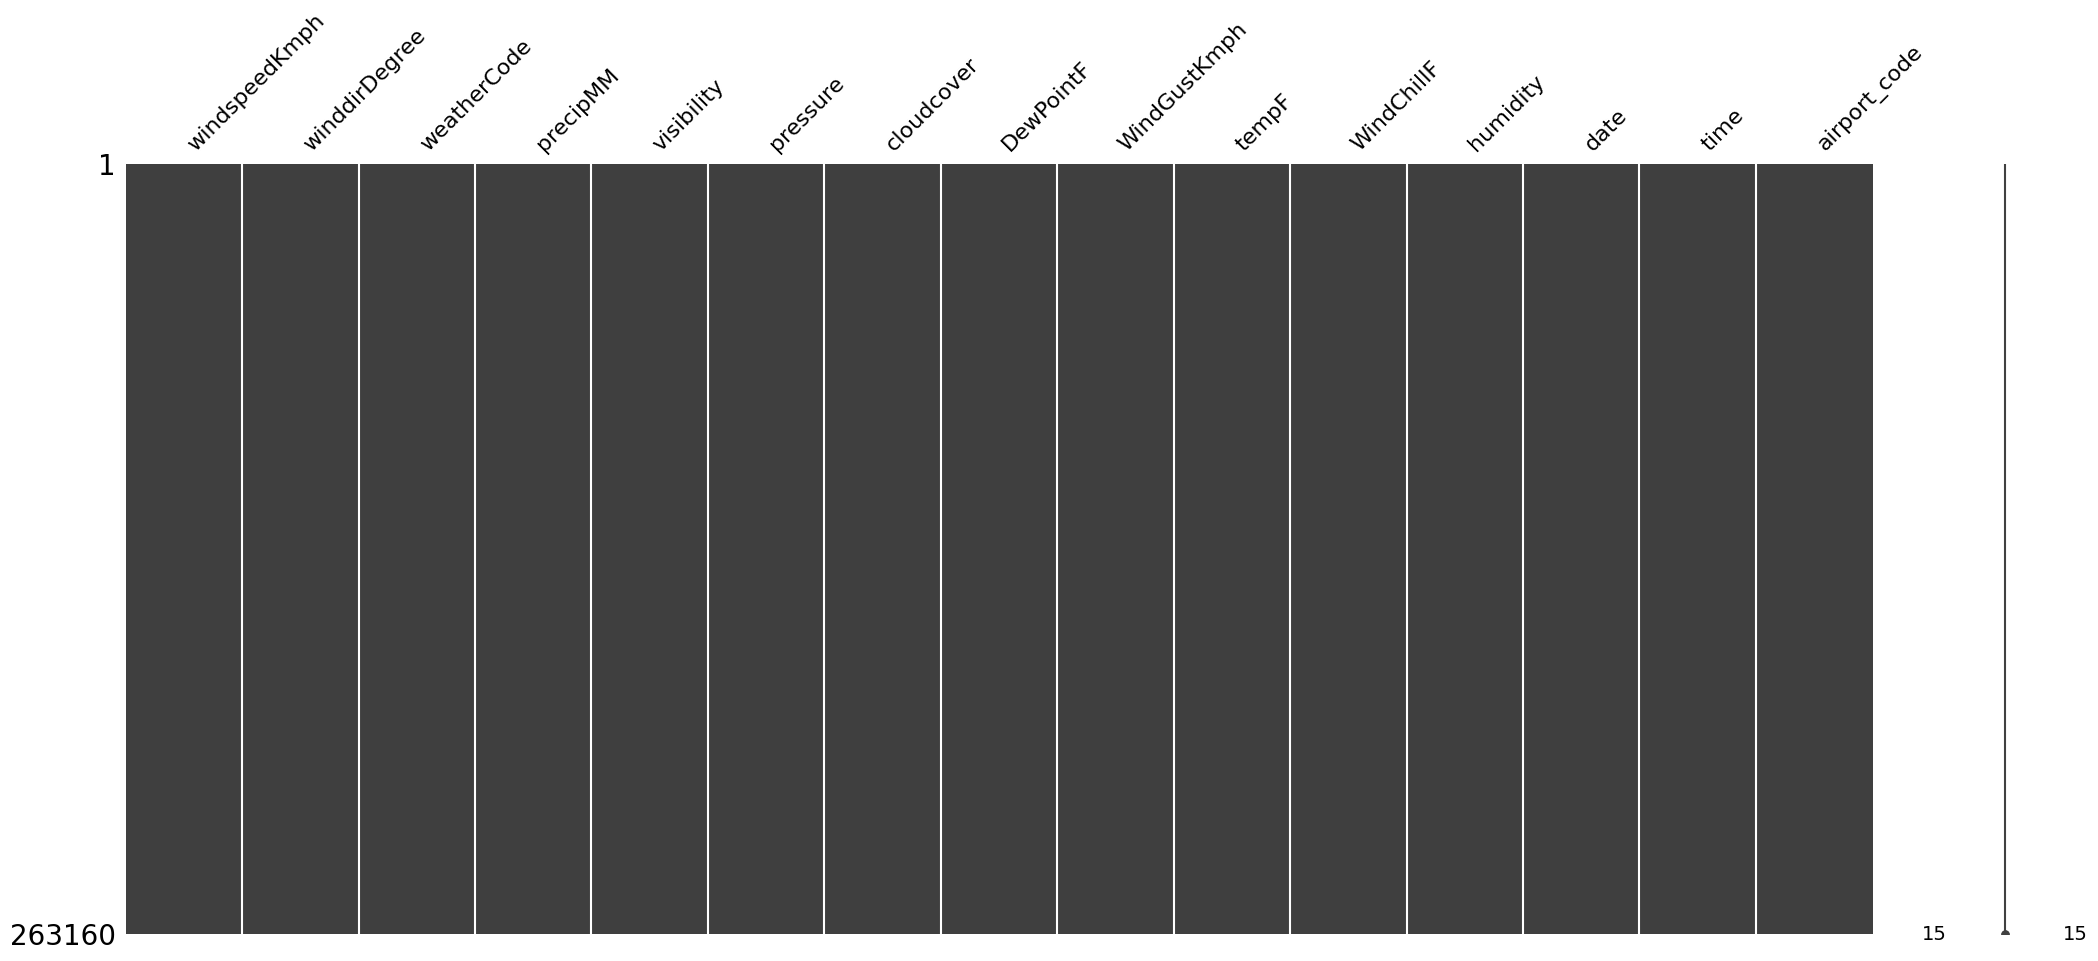

In [ ]:
msno.matrix(weather_data_final)

In [ ]:
weather_data_final = weather_data_final.reset_index(drop=True)


In [ ]:
weather_data_final

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport_code
0,11,318,176,0.1,10,1023,100,47,17,49,46,91,2016-01-01,0,ATL
1,13,317,176,0.0,10,1023,100,44,22,46,42,92,2016-01-01,100,ATL
2,14,315,122,0.0,10,1023,100,41,26,43,38,92,2016-01-01,200,ATL
3,16,314,122,0.0,10,1023,100,38,30,40,33,93,2016-01-01,300,ATL
4,17,314,122,0.0,10,1023,100,38,30,40,33,93,2016-01-01,400,ATL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263155,2,279,116,0.0,10,1019,51,52,5,55,55,92,2017-12-31,1900,SFO
263156,2,255,248,0.0,10,1019,44,53,5,55,55,92,2017-12-31,2000,SFO
263157,1,230,248,0.0,10,1020,38,53,5,55,55,93,2017-12-31,2100,SFO
263158,2,212,248,0.0,10,1020,58,52,4,53,53,95,2017-12-31,2200,SFO


In [ ]:
weather_data_final.to_csv("/content/drive/MyDrive/Flight_delay_prediction/weather_data_full.csv")
